In [6]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime 

Remaining Time: 0.98 seconds
Timer Complete!


In [7]:
settings = {
    'task_name' : 'acquireRecField',

    'xMirror_output': 'PXI1Slot2/ao0',
    'yMirror_output': 'PXI1Slot2/ao1',
    'laser_output': '/PXI1Slot2/port0/line0',
    'sync': '/PXI1Slot2/port0/line1', #output to trigger NP recording

    'Fs': 30000,  # in samples/s
    'xminV' : 8.5, # in Volts. Minimum voltage for mirror
    'xmaxV' : 9.5, # in Volts. Maximum voltage for mirror
    'yminV' : 2.5, # in Volts. Minimum voltage for mirror
    'ymaxV' : 3.5, # in Volts. Maximum voltage for mirror
    'stepV' : .05, # in Volts. Increment of voltage to be stepped for mirror
    'time_per_region' : 0.03, # in seconds. Duration to hold mirrors in place for each region
    'trial_repeats' : 10 # number of times each region should be sampled
}

This experiment will take 2.0 minutes to complete...
400
4000


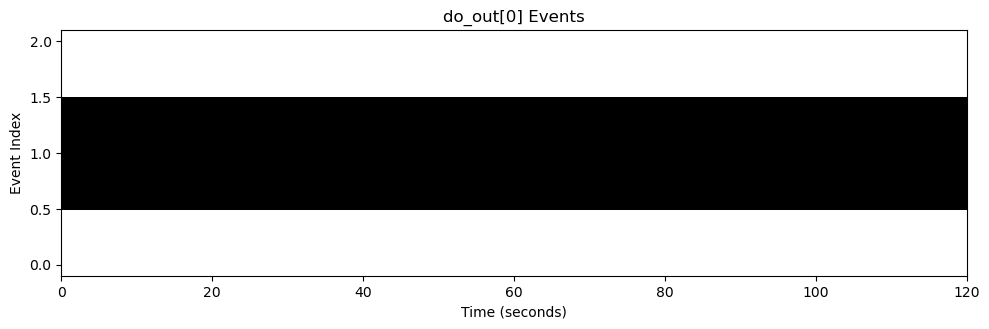

[[1, 2], [4, 5], [7, 8], [1, 2], [4, 5], [7, 8]]


In [39]:
# set mirror x_out and y_out arrays within the specified voltage range and increments
x_out_values = np.arange(settings['xminV'], settings['xmaxV'], settings['stepV'])
y_out_values = np.arange(settings['yminV'], settings['ymaxV'], settings['stepV'])

# create matrix for all possible combinations of x_out and y_out
all_combinations = np.array(np.meshgrid(x_out_values, y_out_values)).T.reshape(-1, 2)
trial_duration = len(all_combinations**2) * settings['time_per_region'] * settings['trial_repeats'] # in seconds
minutes = round(trial_duration/60, 2)
print("This experiment will take {} minutes to complete...".format(minutes))







# shuffle the combinations to randomize the sequence of pulsed regions
np.random.seed(seed = 89786)
np.random.shuffle(all_combinations)

# initialize zeroed-out arrays
numSamples = int(settings['Fs'] * trial_duration)
ao_out = np.zeros((2, numSamples))
do_out = np.zeros((2, numSamples), dtype=bool)

# generate a train of laser pulses for [laser_duration]seconds at [laser_frequency]Hz
laser_duration = 0.0001  # seconds
laser_frequency = settings['Fs']  # Hz (for sustained pulse, equate to settings['Fs'])
laser_samples = int(settings['Fs'] * laser_duration)
laser_pulse_indices = np.arange(0, laser_samples, int(settings['Fs'] / laser_frequency))

all_combinations_repeated = np.tile(all_combinations, (settings['trial_repeats'], 1))
print(len(all_combinations))
print(len(mirror_combinations))

# Fill ao_out with the shuffled sequence and do_out with laser pulses
for i, (x_val, y_val) in enumerate(mirror_combinations):
    start_index = i * int(settings['Fs'] * settings['time_per_region'])
    end_index = start_index + int(settings['Fs'] * settings['time_per_region'])
    ao_out[0, start_index:end_index] = x_val
    ao_out[1, start_index:end_index] = y_val

    # Add laser pulses at the middle of each position's time_per_region
    do_out[0, laser_pulse_indices + int(end_index-((end_index-start_index)/2)) - laser_samples] = True

do_out[1, 1:(numSamples-1)] = True



# Plot the results
plt.figure(figsize=(10, 6))

# # Plot the raster of the trace array firing pattern
# plt.subplot(2, 1, 1)
# plt.eventplot(trace_array, colors='black', linewidths=2)
# plt.title('Trace Array Firing Pattern')
# plt.xlabel('Time (seconds)')
# plt.ylabel('Neuron Index')


# Plot the raster of do_out[0] events for the first few seconds
plt.subplot(2, 1, 2)
event_indices = np.where(do_out[0])[0]
plt.eventplot(event_indices[event_indices < trial_duration * settings['Fs']] / settings['Fs'], colors='black', linewidths=2)
plt.title('do_out[0] Events')
plt.xlabel('Time (seconds)')
plt.ylabel('Event Index')
plt.xlim(0, trial_duration)  # Adjust the xlim based on the desired time range

# # Plot vertical lines at every onset
# onset_indices = np.where(np.diff(do_out[0]) == 1)[0] + 1
# onset_times = onset_indices / Fs
# plt.vlines(onset_times, 0, 2, color='red', linestyle='--', label='Onset')

# plt.legend()
plt.tight_layout()

plt.show()

Remaining Time: 10.00 secondsThis experiment will take 2.0 minutes to complete...


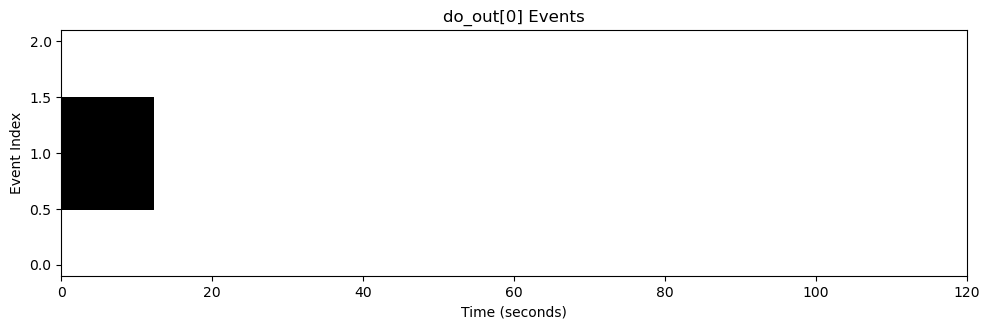

Remaining Time: 0.99 seconds
Timer Complete!


In [8]:
import threading
import time

def countdown_timer(duration):
    start_time = time.time()
    end_time = start_time + duration

    while time.time() < end_time:
        remaining_time = end_time - time.time()
        print("\rRemaining Time: {:.2f} seconds".format(remaining_time), end="", flush=True)
        time.sleep(1)  # Update every 1 second

    print("\nTimer Complete!")

# Example: Run a countdown timer for 10 seconds
timer_thread = threading.Thread(target=countdown_timer, args=(10,))
timer_thread.start()



# set mirror x_out and y_out arrays within the specified voltage range and increments
x_out_values = np.arange(settings['xminV'], settings['xmaxV'], settings['stepV'])
y_out_values = np.arange(settings['yminV'], settings['ymaxV'], settings['stepV'])

# create matrix for all possible combinations of x_out and y_out
all_combinations = np.array(np.meshgrid(x_out_values, y_out_values)).T.reshape(-1, 2)
trial_duration = len(all_combinations**2) * settings['time_per_region'] * settings['trial_repeats'] # in seconds
minutes = round(trial_duration/60, 2)
print("This experiment will take {} minutes to complete...".format(minutes))
# shuffle the combinations to randomize the sequence of pulsed regions
np.random.seed(seed = 89786)
np.random.shuffle(all_combinations)

# initialize zeroed-out arrays
numSamples = int(settings['Fs'] * trial_duration)
ao_out = np.zeros((2, numSamples))
do_out = np.zeros((2, numSamples), dtype=bool)

# generate a train of laser pulses for [laser_duration]seconds at [laser_frequency]Hz
laser_duration = 0.0001  # seconds
laser_frequency = settings['Fs']  # Hz (for sustained pulse, equate to settings['Fs'])
laser_samples = int(settings['Fs'] * laser_duration)
laser_pulse_indices = np.arange(0, laser_samples, int(settings['Fs'] / laser_frequency))

all_combinations_repeated = np.tile(all_combinations, (settings['trial_repeats'], 1))

# Fill ao_out with the shuffled sequence and do_out with laser pulses
for i, (x_val, y_val) in enumerate(all_combinations):
    start_index = i * int(settings['Fs'] * settings['time_per_region'])
    end_index = start_index + int(settings['Fs'] * settings['time_per_region'])
    ao_out[0, start_index:end_index] = x_val
    ao_out[1, start_index:end_index] = y_val

    # Add laser pulses at the middle of each position's time_per_region
    do_out[0, laser_pulse_indices + int(end_index-((end_index-start_index)/2)) - laser_samples] = True

do_out[1, 1:(numSamples-1)] = True



# Plot the results
plt.figure(figsize=(10, 6))

# # Plot the raster of the trace array firing pattern
# plt.subplot(2, 1, 1)
# plt.eventplot(trace_array, colors='black', linewidths=2)
# plt.title('Trace Array Firing Pattern')
# plt.xlabel('Time (seconds)')
# plt.ylabel('Neuron Index')


# Plot the raster of do_out[0] events for the first few seconds
plt.subplot(2, 1, 2)
event_indices = np.where(do_out[0])[0]
plt.eventplot(event_indices[event_indices < trial_duration * settings['Fs']] / settings['Fs'], colors='black', linewidths=2)
plt.title('do_out[0] Events')
plt.xlabel('Time (seconds)')
plt.ylabel('Event Index')
plt.xlim(0, trial_duration)  # Adjust the xlim based on the desired time range

# # Plot vertical lines at every onset
# onset_indices = np.where(np.diff(do_out[0]) == 1)[0] + 1
# onset_times = onset_indices / Fs
# plt.vlines(onset_times, 0, 2, color='red', linestyle='--', label='Onset')

# plt.legend()
plt.tight_layout()

plt.show()


# Wait for the timer thread to complete before exiting the program
timer_thread.join()

In [28]:
np.random.seed(seed = 89786)
trial_voltage = np.random.randint(0,3)
print(trial_voltage)

0
